# CNN(Convolutional Neural Network)을 활용한 MNIST 손글씨 숫자 분류 모델

## import Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

## 데이터 불러오기 및 전처리

In [4]:
# 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 크기 출력
print("훈련 이미지 shape:", x_train.shape)  
print("테스트 이미지 shape:", x_test.shape)   
print("훈련 라벨 shape:", y_train.shape)    
print("테스트 라벨 shape:", y_test.shape)

# CNN 입력을 위해 채널 차원(1) 추가 → shape (60000, 28, 28, 1)
# 또한, uint8 타입의 픽셀 값을 float32로 변환한 뒤 0~1 사이로 정규화
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test  = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# 레이블을 one-hot 인코딩.
y_train_cat = to_categorical(y_train, 10) # 10은 클래스의 개수(0~9)
y_test_cat  = to_categorical(y_test, 10)

훈련 이미지 shape: (60000, 28, 28)
테스트 이미지 shape: (10000, 28, 28)
훈련 라벨 shape: (60000,)
테스트 라벨 shape: (10000,)


## 모델 정의/학습/검증

In [6]:
# CNN 모델 구성
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)), # Conv2D: 이미지에서 공간적 특징(패턴)을 추출하는 필터를 학습한다. 32는 필터 수.
    # 입력 이미지 크기. MNIST는 28x28 크기의 흑백 이미지이므로 채널 수는 1.
    MaxPooling2D((2, 2)), # MaxPooling2D: 이미지의 크기를 줄이며 가장 중요한 특징만 요약합니다. 장점은 아래와 같다.
    # 파라미터 수 감소
    # 연산량 감소
    # 위치 변화에 대한 불변성(robustness) 증가

    Conv2D(64, (3, 3), activation = 'relu'), # 첫 번째 층보다 더 깊은 특징을 추출하기 위해 필터 수를 늘림.
    MaxPooling2D((2, 2)),

    Flatten(), # Flatten: 2D → 1D로 평탄화 # Conv2D & Pooling 결과는 다차원 텐서입니다. 이를 Dense 레이어에 넣기 위해 1차원 벡터로 변환.
    Dense(128, activation = 'relu'), # Dense + Dropout: 완전 연결 + 과적합 방지
    Dropout(0.5), # 과적합 방지 기법. 학습 시 무작위로 50%의 뉴런을 꺼서 모델이 특정 노드에 과도하게 의존하지 않도록 함. 테스트 시에는 모든 뉴런을 사용 (학습 중에만 적용).
    Dense(10, activation = 'softmax')  # 다중 분류이므로 softmax 사용, 0~9 10가지를 분류하는 것이므로 출력층의 뉴런의 개수는 10으로 설정.
])

# 컴파일
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy', # 다중 분류용 손실함수
              metrics = ['accuracy'])

# 학습
history = model.fit(x_train, y_train_cat,
                    epochs = 5, batch_size = 64,
                    validation_split = 0.1)

# 평가
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f" CNN Test Accuracy: {test_acc:.4f}")

# 예측
pred_probs = model.predict(x_test)
pred_labels = np.argmax(pred_probs, axis=1)

Epoch 1/5


C:\Users\plo55\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8325 - loss: 0.5332 - val_accuracy: 0.9830 - val_loss: 0.0581
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9701 - loss: 0.0969 - val_accuracy: 0.9885 - val_loss: 0.0352
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9811 - loss: 0.0622 - val_accuracy: 0.9895 - val_loss: 0.0326
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9854 - loss: 0.0525 - val_accuracy: 0.9907 - val_loss: 0.0342
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9854 - loss: 0.0449 - val_accuracy: 0.9897 - val_loss: 0.0388
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9897 - loss: 0.0290
 CNN Test Accuracy: 0.9918
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


## 검증 시각화

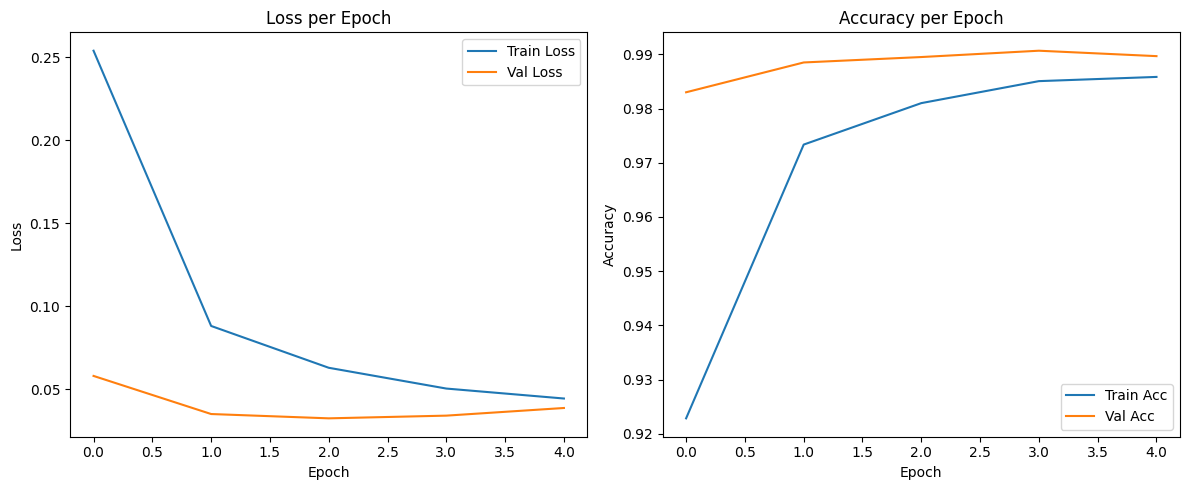

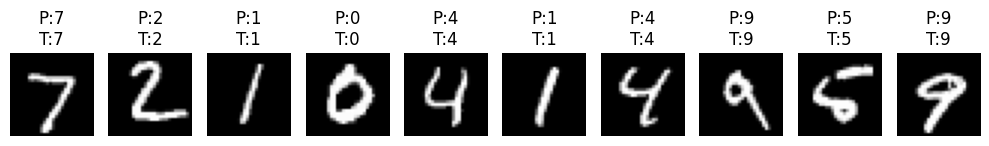

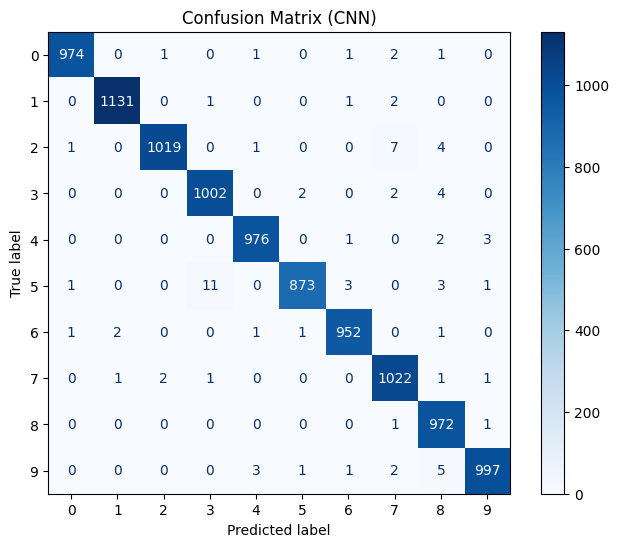

              precision    recall  f1-score   support

           0     0.9969    0.9939    0.9954       980
           1     0.9974    0.9965    0.9969      1135
           2     0.9971    0.9874    0.9922      1032
           3     0.9872    0.9921    0.9896      1010
           4     0.9939    0.9939    0.9939       982
           5     0.9954    0.9787    0.9870       892
           6     0.9927    0.9937    0.9932       958
           7     0.9846    0.9942    0.9894      1028
           8     0.9789    0.9979    0.9883       974
           9     0.9940    0.9881    0.9911      1009

    accuracy                         0.9918     10000
   macro avg     0.9918    0.9916    0.9917     10000
weighted avg     0.9918    0.9918    0.9918     10000



In [11]:
# Loss & Accuracy 그래프
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Train Acc')
plt.plot(history.history['val_accuracy'], label = 'Val Acc')
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# 예시 이미지 비교
plt.figure(figsize = (10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap = 'gray')
    plt.title(f"P:{pred_labels[i]}\nT:{y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# 혼동 행렬
cm = confusion_matrix(y_test, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = np.arange(10))

# 시각화
fig, ax = plt.subplots(figsize = (8, 6))
disp.plot(ax = ax, cmap = 'Blues')
plt.title("Confusion Matrix (CNN)")
plt.show()

# 정밀도, 재현율, F1-score 출력
report = classification_report(y_test, pred_labels, digits = 4)
print(report)